# Multivariate Time Series Analysis Notebook

## 1.1 Install the Necessary Packages

In [3]:
!pip install mysql-connector-python

     |████████████████████████████████| 15.8MB 8.1MB/s eta 0:00:01


#### Restart the Kernel `Kernel>Restart`

## 1.2 Import the Packages

In [4]:
from sklearn import preprocessing
from matplotlib import pyplot as plt
import numpy as np

import ibm_db

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

## 2. Configuration

### 2.1 Insert the Db Credentials

Change the name to `credentials_1`

In [7]:

# @hidden_cell
# The following code contains the credentials for a connection in your Project.
# You might want to remove those credentials before you share your notebook.
MemSQL_credentials = {
    'username': 'admin',
    'password': """memsql123""",
    'database': 'rhmtelco',
    'host': '52.117.50.234',
    'port': '50000',
}


In [8]:
import mysql.connector

mydb = mysql.connector.connect(
  host=MemSQL_credentials['host'],
  user=MemSQL_credentials['username'],
  password=MemSQL_credentials['password'],
  database = MemSQL_credentials['database']
)

print(mydb)

In [9]:

import sqlalchemy

database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'. 
                                               format(MemSQL_credentials['username'], 
                                                      MemSQL_credentials['password'], 
                                                      MemSQL_credentials['host'], 
                                                      MemSQL_credentials['database']))




In [12]:
import pandas as pd

mycursor = mydb.cursor()




mycursor.execute("SELECT * FROM call_drop_data")

myresult = mycursor.fetchall()

field_names = [i[0] for i in mycursor.description]

df_data_1= pd.DataFrame(myresult, columns = field_names)
df_data_1.head()





,outgoing_site_id,start_time_mm_dd_yyyy,start_time_hh_mm_ss_s,weather,total_calls,traffic,latitude,longitude,call_dropped
0,1717,2017-01-01,8:00 to 12:00,Shallow Fog,301,Low,40.710567,-74.007338,17
1,1717,2017-01-01,16:00 to 20:00,Fog,262,Low,40.710567,-74.007338,14
2,1717,2017-01-02,00:00 to 4:00,Partly Cloudy,576,High,40.710567,-74.007338,57
3,1717,2017-01-03,16:00 to 20:00,Mostly Cloudy,502,High,40.710567,-74.007338,60
4,1717,2017-01-03,20:00 to 23:59,Shallow Fog,320,High,40.710567,-74.007338,63


### 2.3 Global Variable

In [13]:
table_name="OUTPUT"

## 3. Pre-Processing

### 3.1 Prepare dataset for Time-Series Model

In [15]:
df_data_1

,outgoing_site_id,start_time_mm_dd_yyyy,start_time_hh_mm_ss_s,weather,total_calls,traffic,latitude,longitude,call_dropped
0,1717,2017-01-01,8:00 to 12:00,Shallow Fog,301,Low,40.710567,-74.007338,17
1,1717,2017-01-01,16:00 to 20:00,Fog,262,Low,40.710567,-74.007338,14
2,1717,2017-01-02,00:00 to 4:00,Partly Cloudy,576,High,40.710567,-74.007338,57
3,1717,2017-01-03,16:00 to 20:00,Mostly Cloudy,502,High,40.710567,-74.007338,60
4,1717,2017-01-03,20:00 to 23:59,Shallow Fog,320,High,40.710567,-74.007338,63
5,1717,2017-01-04,12:00 to 16:00,Shallow Fog,466,Medium,40.710567,-74.007338,34
6,1717,2017-01-07,20:00 to 23:59,Shallow Fog,642,Low,40.710567,-74.007338,19
7,1717,2017-01-08,16:00 to 20:00,Fog,406,Low,40.710567,-74.007338,20
8,1717,2017-01-09,8:00 to 12:00,Shallow Fog,605,Medium,40.710567,-74.007338,34
9,1717,2017-01-09,12:00 to 16:00,Fog,300,Low,40.710567,-74.007338,15


In [30]:
# Set the date column as index for dataset
data = df_data_1.drop(['start_time_mm_dd_yyyy'], axis=1)
data.index = df_data_1.start_time_mm_dd_yyyy

In [38]:
''' NOTE: This example is given so that, ensure there are no nan's in your dataset 
    and they are replaced with type consistent missing values

data[' _dewptm']=data[' _dewptm'].fillna(1000)
'''

" NOTE: This example is given so that, ensure there are no nan's in your dataset \n    and they are replaced with type consistent missing values\n\ndata[' _dewptm']=data[' _dewptm'].fillna(1000)\n"

## 4. Time-Series Model Training

### 4.1 Train your AR Model

In [32]:
ts_data=data['call_dropped']
ts_data

start_time_mm_dd_yyyy
2017-01-01    17
2017-01-01    14
2017-01-02    57
2017-01-03    60
2017-01-03    63
2017-01-04    34
2017-01-07    19
2017-01-08    20
2017-01-09    34
2017-01-09    15
2017-01-10    32
2017-01-10    51
2017-01-10    18
2017-01-11    32
2017-01-12    29
2017-01-12    39
2017-01-13    35
2017-01-14    16
2017-01-14    62
2017-01-14    41
2017-01-16    53
2017-01-17    39
2017-01-17    15
2017-01-18    54
2017-01-18    37
2017-01-19    54
2017-01-19    56
2017-01-20    31
2017-01-22    42
2017-01-24    46
              ..
2017-01-14    48
2017-01-14    17
2017-01-15    58
2017-01-16    13
2017-01-16    36
2017-01-16    39
2017-01-16    49
2017-01-17    31
2017-01-17    27
2017-01-18    50
2017-01-19    51
2017-01-19    14
2017-01-21    49
2017-01-21    60
2017-01-21    31
2017-01-22    33
2017-01-23    53
2017-01-23    35
2017-01-24    35
2017-01-24    56
2017-01-25    24
2017-01-25    23
2017-01-26    45
2017-01-26    48
2017-01-26    15
2017-01-27    35
2017-01-2

In [33]:
ts_log = np.log(ts_data)

In [34]:
ts_log_diff = ts_log - ts_log.shift()

In [35]:
ts_log_diff.dropna(inplace=True)
ts_log_diff

start_time_mm_dd_yyyy
2017-01-01   -0.194156
2017-01-02    1.403994
2017-01-03    0.051293
2017-01-03    0.048790
2017-01-04   -0.616774
2017-01-07   -0.581922
2017-01-08    0.051293
2017-01-09    0.530628
2017-01-09   -0.818310
2017-01-10    0.757686
2017-01-10    0.466090
2017-01-10   -1.041454
2017-01-11    0.575364
2017-01-12   -0.098440
2017-01-12    0.296266
2017-01-13   -0.108214
2017-01-14   -0.782759
2017-01-14    1.354546
2017-01-14   -0.413562
2017-01-16    0.256720
2017-01-17   -0.306730
2017-01-17   -0.955511
2017-01-18    1.280934
2017-01-18   -0.378066
2017-01-19    0.378066
2017-01-19    0.036368
2017-01-20   -0.591364
2017-01-22    0.303682
2017-01-24    0.090972
2017-01-26   -1.263692
                ...   
2017-01-14    1.306252
2017-01-14   -1.037988
2017-01-15    1.227230
2017-01-16   -1.495494
2017-01-16    1.018570
2017-01-16    0.080043
2017-01-16    0.228259
2017-01-17   -0.457833
2017-01-17   -0.138150
2017-01-18    0.616186
2017-01-19    0.019803
2017-01-19  

/opt/conda/envs/Python-3.6-WMLCE/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/envs/Python-3.6-WMLCE/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/envs/Python-3.6-WMLCE/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_conv

Text(0.5, 1.0, 'RSS: 1707.4042')

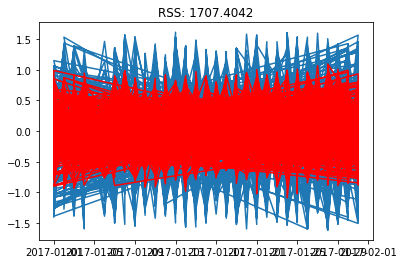

In [36]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

In [37]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

start_time_mm_dd_yyyy
2017-01-01    0.000145
2017-01-02    0.099936
2017-01-03   -0.892766
2017-01-03   -0.492893
2017-01-04   -0.049687
dtype: float64


In [38]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

start_time_mm_dd_yyyy
2017-01-01    0.000145
2017-01-02    0.100082
2017-01-03   -0.792684
2017-01-03   -1.285577
2017-01-04   -1.335264
dtype: float64

In [39]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/opt/conda/envs/Python-3.6-WMLCE/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


start_time_mm_dd_yyyy
2017-01-01    2.833359
2017-01-01    1.824864
2017-01-01    2.605008
2017-01-01    1.982415
2017-01-01    2.005741
dtype: float64

In [40]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

In [42]:
predictions_ARIMA=predictions_ARIMA.groupby('start_time_mm_dd_yyyy').head(6)

### 4.3 Prepare the Dataset for Dashboard

In [43]:
data=data.groupby('outgoing_site_id').head(6)
data

,outgoing_site_id,start_time_hh_mm_ss_s,weather,total_calls,traffic,latitude,longitude,call_dropped
start_time_mm_dd_yyyy,,,,,,,,
2017-01-01,1717,8:00 to 12:00,Shallow Fog,301,Low,40.710567,-74.007338,17
2017-01-01,1717,16:00 to 20:00,Fog,262,Low,40.710567,-74.007338,14
2017-01-02,1717,00:00 to 4:00,Partly Cloudy,576,High,40.710567,-74.007338,57
2017-01-03,1717,16:00 to 20:00,Mostly Cloudy,502,High,40.710567,-74.007338,60
2017-01-03,1717,20:00 to 23:59,Shallow Fog,320,High,40.710567,-74.007338,63
2017-01-04,1717,12:00 to 16:00,Shallow Fog,466,Medium,40.710567,-74.007338,34
2017-01-01,3066,4:00 to 8:00,Shallow Fog,644,Medium,40.7121,-74.0051521,28
2017-01-01,3066,16:00 to 20:00,Fog,526,Low,40.7121,-74.0051521,25
2017-01-02,3066,12:00 to 16:00,Fog,460,Low,40.7121,-74.0051521,20


In [44]:
merged_data=pd.merge(data,pd.DataFrame({"Call Drop Predictions":predictions_ARIMA.astype(int)}), how='inner', left_index=True, right_index=True)
merged_data

,outgoing_site_id,start_time_hh_mm_ss_s,weather,total_calls,traffic,latitude,longitude,call_dropped,Call Drop Predictions
start_time_mm_dd_yyyy,,,,,,,,,
2017-01-01,1717,8:00 to 12:00,Shallow Fog,301,Low,40.710567,-74.007338,17,17
2017-01-01,1717,8:00 to 12:00,Shallow Fog,301,Low,40.710567,-74.007338,17,6
2017-01-01,1717,8:00 to 12:00,Shallow Fog,301,Low,40.710567,-74.007338,17,13
2017-01-01,1717,8:00 to 12:00,Shallow Fog,301,Low,40.710567,-74.007338,17,7
2017-01-01,1717,8:00 to 12:00,Shallow Fog,301,Low,40.710567,-74.007338,17,7
2017-01-01,1717,8:00 to 12:00,Shallow Fog,301,Low,40.710567,-74.007338,17,11
2017-01-01,1717,16:00 to 20:00,Fog,262,Low,40.710567,-74.007338,14,17
2017-01-01,1717,16:00 to 20:00,Fog,262,Low,40.710567,-74.007338,14,6
2017-01-01,1717,16:00 to 20:00,Fog,262,Low,40.710567,-74.007338,14,13


In [46]:
merged_data['Predicted_Call_Drop_Perc']=round((merged_data['Call Drop Predictions']/merged_data['total_calls'])*100,2)
merged_data

,outgoing_site_id,start_time_hh_mm_ss_s,weather,total_calls,traffic,latitude,longitude,call_dropped,Call Drop Predictions,Predicted_Call_Drop_Perc
start_time_mm_dd_yyyy,,,,,,,,,,
2017-01-01,1717,8:00 to 12:00,Shallow Fog,301,Low,40.710567,-74.007338,17,17,5.65
2017-01-01,1717,8:00 to 12:00,Shallow Fog,301,Low,40.710567,-74.007338,17,6,1.99
2017-01-01,1717,8:00 to 12:00,Shallow Fog,301,Low,40.710567,-74.007338,17,13,4.32
2017-01-01,1717,8:00 to 12:00,Shallow Fog,301,Low,40.710567,-74.007338,17,7,2.33
2017-01-01,1717,8:00 to 12:00,Shallow Fog,301,Low,40.710567,-74.007338,17,7,2.33
2017-01-01,1717,8:00 to 12:00,Shallow Fog,301,Low,40.710567,-74.007338,17,11,3.65
2017-01-01,1717,16:00 to 20:00,Fog,262,Low,40.710567,-74.007338,14,17,6.49
2017-01-01,1717,16:00 to 20:00,Fog,262,Low,40.710567,-74.007338,14,6,2.29
2017-01-01,1717,16:00 to 20:00,Fog,262,Low,40.710567,-74.007338,14,13,4.96


In [48]:
merged_data=merged_data.groupby(['outgoing_site_id','start_time_hh_mm_ss_s']).head(1)
merged_data

,outgoing_site_id,start_time_hh_mm_ss_s,weather,total_calls,traffic,latitude,longitude,call_dropped,Call Drop Predictions,Predicted_Call_Drop_Perc
start_time_mm_dd_yyyy,,,,,,,,,,
2017-01-01,1717,8:00 to 12:00,Shallow Fog,301,Low,40.710567,-74.007338,17,17,5.65
2017-01-01,1717,16:00 to 20:00,Fog,262,Low,40.710567,-74.007338,14,17,6.49
2017-01-01,3066,4:00 to 8:00,Shallow Fog,644,Medium,40.7121,-74.0051521,28,17,2.64
2017-01-01,3066,16:00 to 20:00,Fog,526,Low,40.7121,-74.0051521,25,17,3.23
2017-01-01,21106,4:00 to 8:00,Shallow Fog,533,High,40.711376,-74.005152,63,17,3.19
2017-01-01,30178,00:00 to 4:00,Smoke,395,Medium,40.71297,-74.003983,46,17,4.30
2017-01-01,30178,4:00 to 8:00,Shallow Fog,454,High,40.71297,-74.003983,61,17,3.74
2017-01-01,30178,20:00 to 23:59,Fog,305,Medium,40.71297,-74.003983,31,17,5.57
2017-01-01,57151,4:00 to 8:00,Shallow Fog,565,Low,40.713328,-74.006911,25,17,3.01


In [49]:
merged_data=merged_data.reset_index()
del merged_data['start_time_mm_dd_yyyy']

In [50]:
merged_data = merged_data.replace(np.nan, 0, regex=True)

In [51]:
merged_data

,outgoing_site_id,start_time_hh_mm_ss_s,weather,total_calls,traffic,latitude,longitude,call_dropped,Call Drop Predictions,Predicted_Call_Drop_Perc
0,1717,8:00 to 12:00,Shallow Fog,301,Low,40.710567,-74.007338,17,17,5.65
1,1717,16:00 to 20:00,Fog,262,Low,40.710567,-74.007338,14,17,6.49
2,3066,4:00 to 8:00,Shallow Fog,644,Medium,40.7121,-74.0051521,28,17,2.64
3,3066,16:00 to 20:00,Fog,526,Low,40.7121,-74.0051521,25,17,3.23
4,21106,4:00 to 8:00,Shallow Fog,533,High,40.711376,-74.005152,63,17,3.19
5,30178,00:00 to 4:00,Smoke,395,Medium,40.71297,-74.003983,46,17,4.30
6,30178,4:00 to 8:00,Shallow Fog,454,High,40.71297,-74.003983,61,17,3.74
7,30178,20:00 to 23:59,Fog,305,Medium,40.71297,-74.003983,31,17,5.57
8,57151,4:00 to 8:00,Shallow Fog,565,Low,40.713328,-74.006911,25,17,3.01
9,57151,16:00 to 20:00,Fog,374,Low,40.713328,-74.006911,16,17,4.55


In [77]:
merged_data.to_sql(con=database_connection, name=table_name, if_exists='replace')